In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random as random
from casadi import *

In [2]:
def tracer_orientation (x,y,theta, r, i):
    if i == 1 :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' , label = "Axe local suivant x")
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' , label = "Axe local suivant y")
        plt.legend()
    else :
        plt.arrow(x, y, r*cos(theta),r*sin(theta), width = 0.01, color = 'red' )
        plt.arrow(x, y, r*cos(pi/2+theta),r*sin(pi/2+theta), width = 0.01, color = 'yellow' )
    

In [3]:
n = 500
T = 1
taux = T/n

Times = np.linspace(0, T, n)

In [5]:
## variable de position
x = SX.sym('x', n )
y = SX.sym('y', n )
theta = SX.sym('theta', n )

## variable de vitesse 
v1 = SX.sym('v1', n )
v2 = SX.sym('v2', n )
w = SX.sym('w', n )


## variable de accélération 
u1 = SX.sym('u1', n )
u2 = SX.sym('u2', n )
u3 = SX.sym('u3', n )

#### Fonctions utile
f= Function('f',[x],[x[1:]])

p =vertcat(v1[1:],0)
g = Function ('g',[v1],[p])

In [6]:
############# Exemple 1 :

alpha1 = 0.15
alpha2 = 0.25
alpha3 = 0.6

x0 = -4
y0 = -0.9
theta0 = pi

xf = 0
yf = 0
thetaf = pi/2

In [7]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

## les positions
x = opti.variable(n)
y = opti.variable(n)
theta = opti.variable(n)

## les vitesses 
v1 = opti.variable(n)        ## vitesse latérale
v2 = opti.variable(n)        ## vitesse orthogonal
w = opti.variable(n)         ## vitesse angulaire


## les accélération 
u1 = opti.variable(n)        ## accélération latérale
u3 = opti.variable(n)        ## accélération orthogonal
u2 = opti.variable(n)        ## accélération angulaire


opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

    # mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x[0] == x0 + 10**(-4))       
opti.subject_to( y[0] == y0 + 10**(-4))    
opti.subject_to( theta[0] == theta0 + 10**(-4))

        
opti.subject_to( v1[0] == 0.0001 )
opti.subject_to( w[0] == 0.0001 )
opti.subject_to( v2[0] == 0.0001 )
opti.subject_to( v1[-1] == 0.0001 )
opti.subject_to( w[-1] == 0.0001 )
opti.subject_to( v2[-1] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001 )
opti.subject_to( u2[-1] == 0.0001 )
opti.subject_to( u3[-1] == 0.0001 )

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )
opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )
    

    ## pour les conditions finales
opti.subject_to( x[-1]==xf + 10**(-4))
opti.subject_to( y[-1]==yf + 10**(-4))
opti.subject_to( theta[-1]==thetaf + 10**(-4))


opti.solver('ipopt')      # suivant la méthode de KKT

sol = opti.solve()



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality co

In [8]:
U1_0 = sol.value(u1)
U2_0 = sol.value(u2)
U3_0 = sol.value(u3)
V1_0 = sol.value(v1)
W_0 = sol.value(w)
V2_0 = sol.value(v2)
X_0 = sol.value(x)
Y_0 = sol.value(y)
THETA_0 = sol.value(theta)

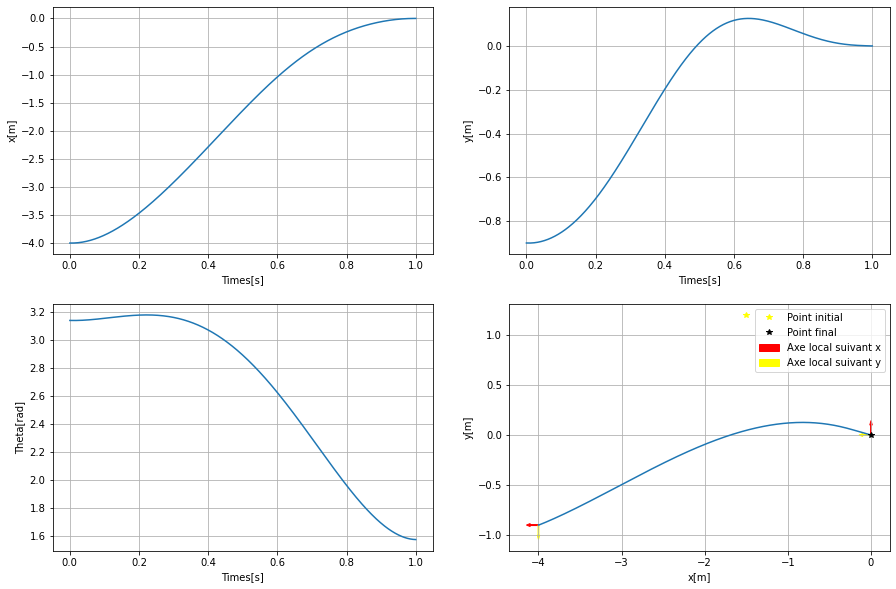

In [17]:
plt.subplots(figsize=(15, 10))

plt.subplot(2, 2, 1) 
plt.plot (Times,X_0 )
plt.xlabel('Times[s]')
plt.ylabel('x[m]')
plt.grid(True)

plt.subplot(2, 2, 2) 
plt.plot (Times,Y_0 )
plt.xlabel('Times[s]')
plt.ylabel('y[m]')
plt.grid(True)

plt.subplot(2, 2, 3) 
plt.plot (Times,THETA_0 )
plt.xlabel('Times[s]')
plt.ylabel('Theta[rad]')
plt.grid(True)

plt.subplot(2, 2, 4) 
plt.plot (X_0,Y_0 )
plt.plot(x0,y0, '*', label = 'Point initial', color = 'yellow')
plt.plot(xf,yf, '*', label = 'Point final', color = 'black')

tracer_orientation (X_0[0],Y_0[0],THETA_0[0], 0.1,0)

#tracer_orientation (X_0[40],Y_0[40],THETA_0[40],0.1,0)
#tracer_orientation (X_0[150],Y_0[150],THETA_0[150],0.1,0)

#tracer_orientation (X_0[250],Y_0[250],THETA_0[250],0.1,0)

tracer_orientation (X_0[-1],Y_0[-1],THETA_0[-1],0.1,1)


plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()

In [12]:
################### Exemple 2

alpha1 = 0.85
alpha2 = 0.05
alpha3 = 0.1

x0 = -1.5
y0 = 1.2
theta0 = pi/10

xf = 0
yf = 0
thetaf = 0

In [13]:
opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

## les positions
x = opti.variable(n)
y = opti.variable(n)
theta = opti.variable(n)

## les vitesses 
v1 = opti.variable(n)        ## vitesse latérale
v2 = opti.variable(n)        ## vitesse orthogonal
w = opti.variable(n)         ## vitesse angulaire


## les accélération 
u1 = opti.variable(n)        ## accélération latérale
u3 = opti.variable(n)        ## accélération orthogonal
u2 = opti.variable(n)        ## accélération angulaire


opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

    # mes fonctions de contrainte d'égalité:

## pour les condition initial
opti.subject_to( x[0] == x0 + 10**(-4))       
opti.subject_to( y[0] == y0 + 10**(-4))    
opti.subject_to( theta[0] == theta0 + 10**(-4))

        
opti.subject_to( v1[0] == 0.0001 )
opti.subject_to( w[0] == 0.0001 )
opti.subject_to( v2[0] == 0.0001 )
opti.subject_to( v1[-1] == 0.0001 )
opti.subject_to( w[-1] == 0.0001 )
opti.subject_to( v2[-1] == 0.0001 )

opti.subject_to( u1[-1] == 0.0001 )
opti.subject_to( u2[-1] == 0.0001 )
opti.subject_to( u3[-1] == 0.0001 )

opti.subject_to( u1[0] == 0.0001 )
opti.subject_to( u2[0] == 0.0001 )
opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )
    

    ## pour les conditions finales
opti.subject_to( x[-1]==xf + 10**(-4))
opti.subject_to( y[-1]==yf + 10**(-4))
opti.subject_to( theta[-1]==thetaf + 10**(-4))


opti.solver('ipopt')      # suivant la méthode de KKT

sol = opti.solve()


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.50e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [14]:
U1_2 = sol.value(u1)
U2_2 = sol.value(u2)
U3_2 = sol.value(u3)
V1_2 = sol.value(v1)
W_2 = sol.value(w)
V2_2 = sol.value(v2)
X_2 = sol.value(x)
Y_2 = sol.value(y)
THETA_2 = sol.value(theta)

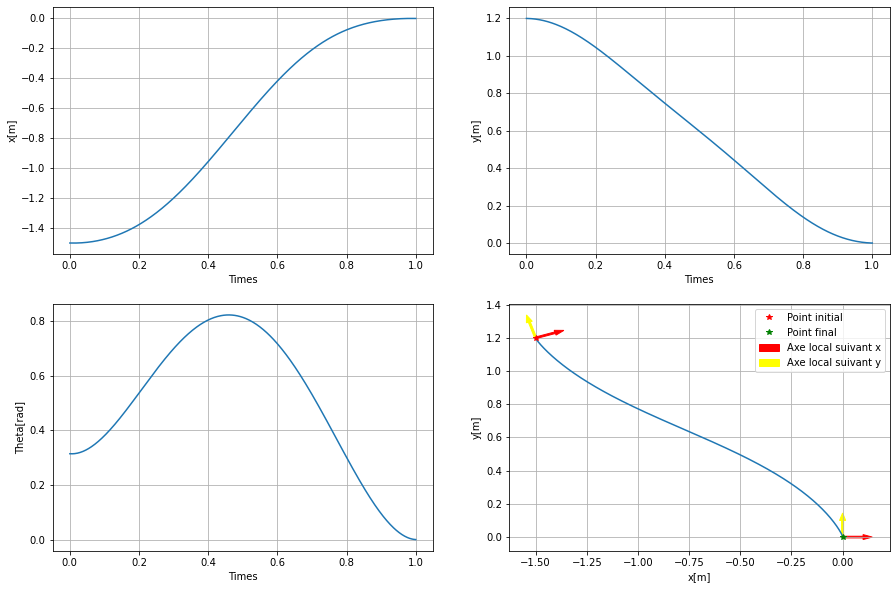

In [16]:
plt.subplots(figsize=(15, 10))

plt.subplot(2, 2, 1) 
plt.plot (Times,X_2 )
plt.xlabel('Times')
plt.ylabel('x[m]')
plt.grid(True)

plt.subplot(2, 2, 2) 
plt.plot (Times,Y_2)
plt.xlabel('Times')
plt.ylabel('y[m]')
plt.grid(True)


plt.subplot(2, 2, 3) 
plt.plot (Times,THETA_2)
plt.xlabel('Times')
plt.ylabel('Theta[rad]')
plt.grid(True)

plt.subplot(2, 2, 4) 
plt.plot (X_2,Y_2 )
plt.plot(x0,y0, '*', label = 'Point initial', color = 'red')
plt.plot(xf,yf, '*', label = 'Point final', color = 'green')

tracer_orientation (X_2[0],Y_2[0],THETA_2[0], 0.1,0)

tracer_orientation (X_2[-1],Y_2[-1],THETA_2[-1],0.1,1)


plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.grid(True)
plt.legend()
